In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import re

from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 경고표시 지우기
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
filepath = "./data/model/model_lstm_220110.h5"

model = load_model(filepath, custom_objects=None, compile=True)

In [3]:
dir(model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

['생크림이', '좀더', '듬뿍', '올라가고', ',', '시트가', '더', '부드러우면', '더', '맛있을거같다', '우유향이', '나고', '부드러운', '생크림', '신선하고', '새콤달콤한', '딸기', '드립커피도', '꽤', '괜찮은', '편', '양에', '비해', '비싸지만', '만족스러운', '딸기케이크였다']
['굿굿', '!', '']
['맛있어요']
['맛있어요']
['진짜', '유명해서', '한번', '먹어봄', '생딸기가', '아니고', '절임딸기', '한조각', '6300원', '시트도', '퍼석하고', '크림은', '그냥그럼', '이게', '맛있다는', '분들은', '생딸기를', '안드셔보셨거나', '생딸기를', '너무', '많이', '먹어서', '질려서', '맛있으신듯', '내', '돈', '내', '시간', '']


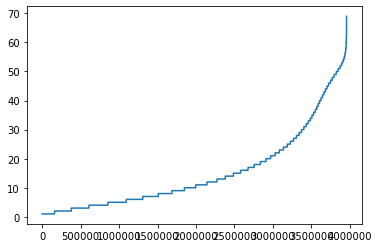

3401248
['생크림이', '좀더', '듬뿍', '올라가고', ',', '시트가', '더', '부드러우면', '더', '맛있을거같', '우유향이', '나고', '부드러운', '생크림', '신선하고', '새콤달콤한', '딸기', '드립커피도', '꽤', '괜찮은', '편', '양에', '비해', '비싸지만', '만족스러운', '딸기케이크']
['굿굿', '!', '']
['맛있어요']
['맛있어요']
['진짜', '유명해서', '한번', '먹어봄', '생딸기가', '아니고', '절임딸기', '한조각', '6300원', '시트도', '퍼석하고', '크림은', '그냥그럼', '이게', '맛있다는', '분들은', '생딸기를', '안드셔보셨', '생딸기를', '너무', '많이', '먹어서', '질려서', '맛있으신듯', '내', '돈', '내', '시간', '']


In [4]:
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

df = pd.read_csv("./data/review_data/total_review.csv", encoding="utf-8-sig", index_col=0)
review_df = df.dropna(axis=0)

# 컬럼 재배치
# review_df = review_df[["review","score"]]

# clean_str 함수를 통해서 X데이터를 정제해주어야함.
train_test_X = [clean_str(sentence) for sentence in review_df["review"]]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_test_X]
for i in range(5):
    print(sentences[i])

# 문장의 길이를 그래프화
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

# 총 3956974행의 데이터 중 30문장이내의 데이터는 3401248으로 85.9%에 육박.
# 따라서, padding의 기준을 30로 잡겠음.
print(sum([int(l<=30) for l in sentence_len]))
    
sentence_new = []
for sentence in sentences:
    sentence_new.append([word[:5] for word in sentence][:30])

sentences = sentence_new

for i in range(5):
    print(sentences[i])

tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(sentences)

In [5]:
mango = pd.read_excel("./data/망고플레이트 리뷰 종합.xlsx")

mango

,Unnamed: 0,이름,평점,주소,주력 메뉴,가격대,망고플레이트 주소,리뷰내용
0,3869.0,청우참치,\n4.5\n,서울특별시 강남구 강남대로 632,\n회 / 스시\n,4만원 이상,https://www.mangoplate.com//restaurants/YyRGx0...,\n 가로수길에 있는 오랜 참치맛집 e-청우참치위치를 옮기다!!원래...
1,3865.0,청우참치,\n4.5\n,서울특별시 강남구 강남대로 632,\n회 / 스시\n,4만원 이상,https://www.mangoplate.com//restaurants/YyRGx0...,"\n 가성비 너무 좋고, 정말 양질의 참치를 양껏 즐길 수 있어서 ..."
2,3867.0,청우참치,\n4.5\n,서울특별시 강남구 강남대로 632,\n회 / 스시\n,4만원 이상,https://www.mangoplate.com//restaurants/YyRGx0...,\n 가성비 좋은 한국식 참치횟집. 선도가 꽤 좋다. 카운터석도 있...
3,3868.0,청우참치,\n4.5\n,서울특별시 강남구 강남대로 632,\n회 / 스시\n,4만원 이상,https://www.mangoplate.com//restaurants/YyRGx0...,\n 그저 박수만. 참치땡길때 여기만한 곳이 없다.\n
4,3863.0,청우참치,\n4.5\n,서울특별시 강남구 강남대로 632,\n회 / 스시\n,4만원 이상,https://www.mangoplate.com//restaurants/YyRGx0...,\n 맛있다.. 느끼해서 많이 못먹는게 함정.\n
...,...,...,...,...,...,...,...,...
36203,NaN,키미노돼지국밥,-,서울특별시 중랑구 중랑천로10길 92 1F,\n탕 / 찌개 / 전골\n,만원 미만,https://www.mangoplate.com//restaurants/OGDe64...,\n 뜨끈한 돼지국밥 생각 날 때 자주 찾는 곳.멀리서도 먹으러 찾...
36204,NaN,조개나루터,-,서울특별시 중랑구 중랑천로12길 59,\n해산물 요리\n,NaN,https://www.mangoplate.com//restaurants/MgyUt1...,\n 11월말에 처음 가보고나서 12~1월두달동안 벌써 8번이나 다...
36205,NaN,조개나루터,-,서울특별시 중랑구 중랑천로12길 59,\n해산물 요리\n,NaN,https://www.mangoplate.com//restaurants/MgyUt1...,\n 가리비크기 미친거아닌가요.......내일 또갈래요..........
36206,NaN,제주돈선생,-,서울특별시 중랑구 중랑천로12길 61,\n고기 요리\n,만원-2만원,https://www.mangoplate.com//restaurants/JtAAHT...,"\n 굳이 없는 식당까지 등록해가며 쓰지 않는데, 고기도 맛있고 사..."


In [6]:
mango_sentence = []
for review in mango.iloc[:20,-1]:
    mango_sentence.append(review)
    
mango_sentence

mango_score = []
for score in mango.iloc[:20,2]:
    mango_score.append(score)
    
mango_score

['\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.5\n',
 '\n4.3\n',
 '\n4.3\n',
 '\n4.3\n',
 '\n4.3\n',
 '\n4.3\n']

In [7]:
cnt = 0

# 망고플레이트 리뷰 테스트
for review in mango_sentence:
    test_sentence = review
    test_sentence = test_sentence.split(' ')
    test_sentences = []
    now_sentence = []
    for word in test_sentence:
        now_sentence.append(word)
        test_sentences.append(now_sentence[:])

    test_X_1 = tokenizer.texts_to_sequences(test_sentences)
    test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=30)
    prediction = model.predict(test_X_1)
    for idx, sentence in enumerate(test_sentences):
#         print(sentence)
#         print((prediction[idx]).round(3))
        review_score = np.argmax((prediction[idx]).round(3))
    # print(review)
    print(review_score)
    print(mango_score[cnt])
    print("-"*70)
    cnt+=1

# tmp_score_list = []
# cnt = 1

# for data in review_score:
#     if not tmp_score_list:
#         tmp_score_list.append(data)
#     else:
#         tmp_score_list.append(data)
#         if tmp_score_list[0] > tmp_score_list[1]:
#             del tmp_score_list[1]
#         else:
#             del tmp_score_list[0]
    
# print(tmp_score_list)
    
# print(tmp_score_list)
# 띄어쓰기 기준으로 끊는 것이니 

5

4.5

----------------------------------------------------------------------
4

4.5

----------------------------------------------------------------------
4

4.5

----------------------------------------------------------------------
3

4.5

----------------------------------------------------------------------
2

4.5

----------------------------------------------------------------------
3

4.5

----------------------------------------------------------------------
2

4.5

----------------------------------------------------------------------
4

4.5

----------------------------------------------------------------------
3

4.5

----------------------------------------------------------------------
2

4.5

----------------------------------------------------------------------
2

4.5

----------------------------------------------------------------------
4

4.5

----------------------------------------------------------------------
5

4.5

--------------------------------------------

In [16]:
# 망고 플레이트에서 가게 랜덤으로 뽑아서 점수 예측.

import random

cnt = 0

mango_store_list = []

for store in mango["이름"].unique():
    mango_store_list.append(store)

choiceList = random.choice(mango_store_list)

data = mango[mango["이름"]==choiceList]
print("뽑은 가게는 {}입니다.".format(str(data["이름"].unique())))

# 망고플레이트 리뷰 테스트
for review in data.iloc[:,-1]:
    test_sentence = review
    test_sentence = test_sentence.split(' ')
    test_sentences = []
    now_sentence = []
    for word in test_sentence:
        now_sentence.append(word)
        test_sentences.append(now_sentence[:])

    test_X_1 = tokenizer.texts_to_sequences(test_sentences)
    test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=30)
    prediction = model.predict(test_X_1)
    for idx, sentence in enumerate(test_sentences):
#         print(sentence)
#         print((prediction[idx]).round(3))
        review_score = np.argmax((prediction[idx]).round(3))
    # print(review)
    print("리뷰\n", review)
    print("실제 점수 : ", data.iloc[cnt,2])
    print("예측한 점수 : ", review_score)
#     print(mango_score[cnt])
    print("-"*70)
    cnt+=1

뽑은 가게는 ['시골감자국']입니다.
리뷰
 
          감자국이 대개 거기서 거기인데..여기는 지저분함...그냥 지저분함. 북한말쓰는 할머니는 음식에는 별 관심이 없는 듯 하고, 재료도 조금 추저분하고.하여간 내 느낌 한 마디로 지저분..
        
실제 점수 :  -
예측한 점수 :  2
----------------------------------------------------------------------
리뷰
 
          강력추천합니다.외부가 그리 깔끔한 편은 아니지만맛 하나는 정말 좋아요!김치랑 깍두기도 직접 담그시는지정말 맛있고 줌문하면 빈대떡도 하나부쳐주심 ㅡㅅ ㅡb그리고 1층보다는 2층이 더 아늑하고 좋아요~~
        
실제 점수 :  -
예측한 점수 :  4
----------------------------------------------------------------------
리뷰
 
          맛이나 양 둘 다 멀리 가지 않고 동네에서 먹기 무난한 수준이네요.유난히 맛있는건 아니지만 그렇다고 맛 없는건 아닌평균 이상은 하는 감자탕이라 생각해요.다만 감자탕 다 먹은 후 밥 볶아먹는걸 좋아하는데볶음밥이 입맛에 안 맞는게 단점이에요 ㅠㅠ다음부터는 감자탕만 시켜먹을것 같아요
        
실제 점수 :  -
예측한 점수 :  3
----------------------------------------------------------------------
리뷰
 
          은평구 30년전통 감자탕집에 와서 한번 먹어보았습니다고기가 연하고 김치,깍두기 맛좋고 새로한것 같음. 서비스도 좋고 그래요. 뭐 부침개달라고하면 더줌.참고로 여기 감자탕집 거리인데 여기가 원조라고합니다. 앞집은 고모부가 한다며 ㅋㅋㅋ배달도 된다는데 다음에도 여기 또 와봐야겠음
        
실제 점수 :  -
예측한 점수 :  3
----------------------------------------------------

In [43]:
# 망고플레이트 리뷰 테스트
store = input("가게 이름을 입력하시오 : ")

data = mango[mango["이름"]==store]
if data.empty is True:
    print("데이터가 없습니다.")

else:
    score_sum = 0
    cnt=0

    for review in data.iloc[:,-1]:
        test_sentence = review
        test_sentence = test_sentence.split(' ')
        test_sentences = []
        now_sentence = []
        for word in test_sentence:
            now_sentence.append(word)
            test_sentences.append(now_sentence[:])

        test_X_1 = tokenizer.texts_to_sequences(test_sentences)
        test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=30)
        prediction = model.predict(test_X_1)
        for idx, sentence in enumerate(test_sentences):
            review_score = np.argmax((prediction[idx]).round(3))
        print("리뷰\n", review)
        print("실제 점수 : ", data.iloc[cnt,2])
        print("예측한 점수 : ", review_score)
        print("-"*70)
        score_sum += review_score
        cnt+=1
    print("예측한 평균 평점 : {}".format((score_sum/cnt+1).round(2)))

가게 이름을 입력하시오 : 청우참치
리뷰
 
          가로수길에 있는 오랜 참치맛집 e-청우참치위치를 옮기다!!원래 있던 자리의 건물이 매각되어 바로 인근으로 옮기고 살짝 리모델링(?)까지는 아니지만 옮기고 아주 살짝 넒어진 느낌이지만 그래도 바테이블에 앉으면 엄청 다닥다닥 붙어 앉아야 하지만 정감가는 매력이 있는곳.이곳에서는 참치는 부위별로 다양한 맛을 즐길 수 있는데~ 원래 빨간부위를 좋아했는데 청우참치에서 다른 부위의 맛도 즐기게 됨 마블링있는 부위는 마치 소고기를 먹는것처럼 살짝 기름지면서 고소하고 부드러움 ㅠㅠ 더 많이 먹었어야 했는데 내 위가 왜 허락칠 않는거니ㅠㅠ 쓸데없이 감자랑 콘버터까지 맛있음... 예약을 잘 받지않아 대기해야하고 주말에도 예전에는 영업 안했는데 가시려면 확인하고 가야해요~^^
        
실제 점수 :  
4.5

예측한 점수 :  5
----------------------------------------------------------------------
리뷰
 
          가성비 너무 좋고, 정말 양질의 참치를 양껏 즐길 수 있어서 더 좋다. 참치하면 청우참치 말고 다른 곳은 생각이 안난다...
        
실제 점수 :  
4.5

예측한 점수 :  4
----------------------------------------------------------------------
리뷰
 
          가성비 좋은 한국식 참치횟집. 선도가 꽤 좋다. 카운터석도 있고 바닥에 양반다리 하고 앉아먹기도 하는 아저씨스타일집. 단촛물밥 달라고 해서 초밥으로 싸먹으면 맛있다. 분위기나 멋 포기하고 오로지 참치만 생각한다면 추천
        
실제 점수 :  
4.5

예측한 점수 :  4
----------------------------------------------------------------------
리뷰
 
          그저 박수만. 참치땡길때 여기만한 곳이 없다.
        


['생크림이', '좀더', '듬뿍', '올라가고', ',', '시트가', '더', '부드러우면', '더', '맛있을거같다', '우유향이', '나고', '부드러운', '생크림', '신선하고', '새콤달콤한', '딸기', '드립커피도', '꽤', '괜찮은', '편', '양에', '비해', '비싸지만', '만족스러운', '딸기케이크였다']
['굿굿', '!', '']
['맛있어요']
['맛있어요']
['진짜', '유명해서', '한번', '먹어봄', '생딸기가', '아니고', '절임딸기', '한조각', '6300원', '시트도', '퍼석하고', '크림은', '그냥그럼', '이게', '맛있다는', '분들은', '생딸기를', '안드셔보셨거나', '생딸기를', '너무', '많이', '먹어서', '질려서', '맛있으신듯', '내', '돈', '내', '시간', '']


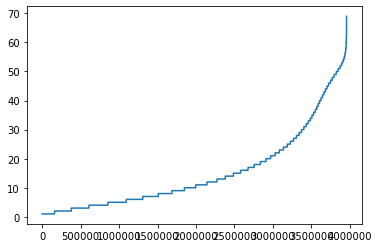

3401248
['생크림이', '좀더', '듬뿍', '올라가고', ',', '시트가', '더', '부드러우면', '더', '맛있을거같', '우유향이', '나고', '부드러운', '생크림', '신선하고', '새콤달콤한', '딸기', '드립커피도', '꽤', '괜찮은', '편', '양에', '비해', '비싸지만', '만족스러운', '딸기케이크']
['굿굿', '!', '']
['맛있어요']
['맛있어요']
['진짜', '유명해서', '한번', '먹어봄', '생딸기가', '아니고', '절임딸기', '한조각', '6300원', '시트도', '퍼석하고', '크림은', '그냥그럼', '이게', '맛있다는', '분들은', '생딸기를', '안드셔보셨', '생딸기를', '너무', '많이', '먹어서', '질려서', '맛있으신듯', '내', '돈', '내', '시간', '']
리뷰
 
          - 한줄평: 요새는 괜찮은 고기집이 너무 많다...- 주문 메뉴: 삽겹살, 목살
        
실제 점수 :  
3.9

예측한 점수 :  2
----------------------------------------------------------------------
리뷰
 
          ⭐️⭐️⭐️⭐️⭐️망플 리뷰보고 갔다가 반해서 여러번 다녀왔어요. 굉장히 한적한 아파트 단지 옆에 뜬금없이 위치해 있습니다. 일단 여기 밑반찬 구성이 아주 좋아요. 명이나물 잔뜩+장아찌와 피클류, 양념들까지 전부 맛있습니다. (특히 다진 마늘 섞인 양념장.. 넘 맛있어요) 고기 스펙을 주셔서 농장주와 도축 일자까지 알 수 있는 점이 특이해요. 신뢰도 올라감. 삼겹살 두께도 어마어마하고 육질도 팍팍 터져요. 좋은 품질의 고기를 쓴다는게 바로 느껴졌습니다. 명이나물나 깻잎 싸먹으면 존맛 ♥ 체인화되서 여기저기 많아졌던데 다른 지점은 어떨지 몰라도 본점은 추천합니당
        
실제 점수 :  
3.9

예측한 점수 :  5
-----------------------------------

In [12]:
##### 정리


##### import Library #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import re
import random

from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 경고표시 지우기
import warnings
warnings.filterwarnings(action="ignore")
##### import Library #####

##### function #####
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

def model_load(file_path):
    print("모델 불러오는 중...")
    # model load
    filepath = file_path
    model = load_model(filepath, custom_objects=None, compile=True)
    
    return model

def data_load(dataframe):
    print("데이터 불러오는 중...")
    df = pd.read_csv(dataframe, encoding="utf-8-sig", index_col=0)
    review_df = df.dropna(axis=0)
    
    return review_df

def data_preprocessing(review_df):
    print("데이터 정제 중...")
    # clean_str 함수를 통해서 X데이터를 정제해주어야함.
    train_test_X = [clean_str(sentence) for sentence in review_df["review"]]
    # 문장을 띄어쓰기 단위로 단어 분리
    sentences = [sentence.split(' ') for sentence in train_test_X]
    for i in range(5):
        print(sentences[i])

    # 문장의 길이를 시각화
    # padding의 기준을 잡는 부분
    sentence_len = [len(sentence) for sentence in sentences]
    sentence_len.sort()
    plt.plot(sentence_len)
    plt.show()

    # 총 3956974행의 데이터 중 30문장이내의 데이터는 3401248으로 85.9%에 육박.
    # 따라서, padding의 기준을 30로 잡겠음.
    print(sum([int(l<=30) for l in sentence_len]))

    sentence_new = []
    for sentence in sentences:
        sentence_new.append([word[:5] for word in sentence][:30])

    sentences = sentence_new

    for i in range(5):
        print(sentences[i])

    tokenizer = Tokenizer(num_words=3000)
    tokenizer.fit_on_texts(sentences)
    
    return sentences, tokenizer

def model_random_test(tokenizer, mango):
    print("모델 테스트 중...")
    # 망고 플레이트에서 가게 랜덤으로 뽑아서 점수 예측.
    cnt = 0
    mango_store_list = []
    try:
        for store in mango["이름"].unique():
            mango_store_list.append(store)

        choiceList = random.choice(mango_store_list)

        data = mango[mango["이름"]==choiceList]
        print("뽑은 가게는 {}입니다.".format(str(data["이름"].unique())))

        score = 0
    except:
        print("망고플레이트 Database안에 없는 가게입니다.")

    # 망고플레이트 리뷰 테스트
    for review in data.iloc[:,-1]:
        test_sentence = review
        test_sentence = test_sentence.split(' ')
        test_sentences = []
        now_sentence = []
        for word in test_sentence:
            now_sentence.append(word)
            test_sentences.append(now_sentence[:])

        test_X_1 = tokenizer.texts_to_sequences(test_sentences)
        test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=30)
        prediction = model.predict(test_X_1)
        for idx, sentence in enumerate(test_sentences):
            review_score = np.argmax((prediction[idx]).round(3))
            
        print("리뷰\n", review)
        print("실제 점수 : ", data.iloc[cnt,2])
        print("예측한 점수 : ", review_score)
        print("-"*70)
        cnt+=1

def model_test(tokenizer, mango):
    print("모델 테스트 중...")
    print("리뷰 모델 테스트.")
    store = input("가게 이름을 입력하시오 : ")

    data = mango[mango["이름"]==store]
    if data.empty is True:
        print("Database에 해당 가게가 없습니다.")

    else:    
            score_sum = 0
        cnt=0

        for review in data.iloc[:,-1]:
            test_sentence = review
            test_sentence = test_sentence.split(' ')
            test_sentences = []
            now_sentence = []
            for word in test_sentence:
                now_sentence.append(word)
                test_sentences.append(now_sentence[:])

            test_X_1 = tokenizer.texts_to_sequences(test_sentences)
            test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=30)
            prediction = model.predict(test_X_1)
            for idx, sentence in enumerate(test_sentences):
                review_score = np.argmax((prediction[idx]).round(3))
            print("리뷰\n", review)
            print("실제 점수 : ", data.iloc[cnt,2])
            print("예측한 점수 : ", review_score)
            print("-"*70)
            score_sum += review_score
            cnt+=1
        print("예측한 평균 평점 : {}".format((score_sum/cnt+1).round(2)))
        
##### function #####

##### Main #####
if __name__  == "__main__":
    
    path = "./data/model/model_lstm_220110.h5"
    model = model_load(file_path = path)
    
    data = "./data/review_data/total_review.csv"
    df = data_load(data)
    
    # 망고플레이트 리뷰 데이터
    mango = pd.read_excel("./data/망고플레이트 리뷰 종합.xlsx")
    
    _, token = data_preprocessing(df)
    try:
        opinion = input("어느 기능을 사용하시겠습니까(1:작동테스트 / 2:가게입력) : ")
        if opinion == 1:
            model_random_test(tokenizer=token, mango=mango)
        else:
            model_test(tokenizer=token, mango=mango)
    except:
        print("번호를 잘못 입력하셨습니다. 1번과 2번중 골라주세요.")